# AI Learns to Play Connect 4
#### Jordan Yeomans - 2018

## Part 2 - Reading Saved Game Files

### What's Next?

At this stage, we want to build a function that can open the historical data files we have saved and plot the board. This is a great way to make sure that the saved data is formatted correctly. 

Additionally, as we build more and more complex AI I am sure we will want to be able to visualise what is happening.

#### Step 1 - Load a saved game file

Remember, our saved games have been created in the format:
- A new file for each game
- Dim 1: Round #
- Dim 2: Rows
- Dim 3: Columns

We can now load a selected game file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Parameters for us to change
folder = './Games/'
game_num_to_plot = 0
round_to_plot = 9

# Get a list of all files in the load folder (note, only games should be in this folder)
games = os.listdir(folder)

# Assign the board to the chosen round to plot
current_game = np.load(folder + games[game_num_to_plot])

print('Total Games = {}'.format(len(games)))
print('current_game shape = {}'.format(current_game.shape))

Total Games = 2
current_game shape = (30, 6, 7)


#### Step 2 - Find the Last Round

The function we will build will work for any round, but it's more fun if we can see the final round, so let's find that.

Recall that when we created the file, we used 30 blank rounds and filled them in round after round. When the game ended we have a tail of rounds that are equal to zero. We need to find the first round of zero's and from there we know that the round just before that must have been the last round

1. First we iterate over all rounds (First dimension of the array)
2. Take the absolute value of the board (Turn any negatives to positives)
3. Sum the total
4. Repeat until the total is 0. At this point we know this is an empty board, and the board previously must have been the last board
5. If the absolute sum is 0, break the loop. At this point the final round is (round - 1)

We can print the absolute sum for each iteration to gain an intution of what is happening

In [2]:
# Find Last Round
for round in range(current_game.shape[0]):
    current_game_abs = np.abs(current_game[round])
    current_game_sum = np.sum(current_game_abs)
    
    print('Round {}, Absolute Sum = {}'.format(round, current_game_sum))
    
    if current_game_sum == 0:
        round -= 1
        break

print('Final Round = {}'.format(round))

Round 0, Absolute Sum = 1.0
Round 1, Absolute Sum = 3.0
Round 2, Absolute Sum = 5.0
Round 3, Absolute Sum = 7.0
Round 4, Absolute Sum = 9.0
Round 5, Absolute Sum = 10.0
Round 6, Absolute Sum = 0.0
Final Round = 5


#### Step 3 - Print Last Round

We can get to the final game board by selecting the last round index and assigning it to a variable called final board. Let's print the board so we can see what it looks like

In [3]:
# Assign the final board
final_board = current_game[round]

print(final_board)

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0. -1. -1. -1.  0.  0.]
 [ 0.  1.  1. -1.  1. -1.  0.]]


#### Step 4 - Create A Function To Plot The Board

To plot the board, we follow the following steps:

1. Iterate over all rows
2. For each row, we iterate over all columns
3. If any points = 1, we plot a yellow point (s = 500 is the size, edgecolours black gives it a black outline
4. Similarly for -1, we plot a red point
5. Add a few plot controls such as a grid and axis limits
6. Show the plot

In [4]:
def plot_board(board):
    ''' This function reads a saved board and plots Red and Yellow tokens in their correct positions

    Input: Numpy Array of Shape(6,7) containing:

    1 represents yellow tokens
    -1 represents red tokens
    0 represents an open space

    Returns:
    Shows a plot of the current board
    '''
    
    # Create New Figure
    plt.figure() 
    
    # Iterate over all board rows
    for row in range(board.shape[0]):
        
        # Iterate over all board rows
        for col in range(board.shape[1]):
            
            # Plot all tokens that = 1 as yellow
            if board[5-row][col] == 1:
                plt.scatter(col, row, c='Yellow', s=500, edgecolors='black')
            
            # Plot all tokens that = -1 as red
            if board[5-row][col] == -1:
                plt.scatter(col, row, c='Red', s=500, edgecolors='black')
    
    plot_margin = 0.4                         # Padding around edges
    plt.grid()                                # Turn on grid
    plt.ylim(-plot_margin, 5 + plot_margin)   # Set Y Limits
    plt.xlim(-plot_margin, 6 + plot_margin)   # Set X Limits
    plt.show()                                # Show Plot

#### Step 5 - Plot The Final Board

Let's simply call the function we have just made to make sure it works

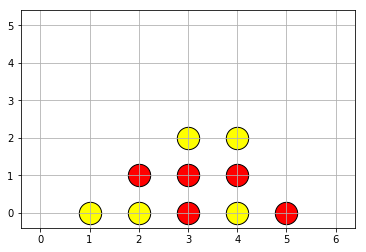

In [5]:
# Plot Board
plot_board(final_board)

#### Step 6 - Check Final Round + 1

To make sure our function to get the last round worked properly, lets plot the final round + 1. Hopefully it's blank

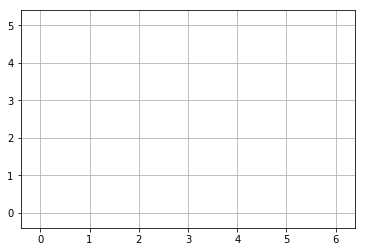

In [6]:
# Assign the final board
final_board = current_game[round + 1]

# Plot Board
plot_board(final_board)

#### Step 7 - Check Final Round - 1

We can also check round-1, which should be 1 set of moves before the round shown in step 5

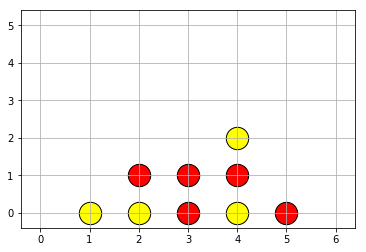

In [7]:
# Assign the final board
final_board = current_game[round - 1]

# Plot Board
plot_board(final_board)

#### Done!

Great, now we can go onto Part 3!

In Part 3 we are going to make a small modification to the original bot to speed up the training process so that it chooses a winning move if it has the opportunity to.

If you want to copy and paste the entire code, here it is: (Note a few comments have been removed)

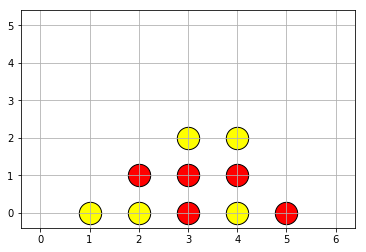

In [8]:
'''
AI Learns to Play Connect 4
Part 2 - Reading Saved Game Files
Jordan Yeomans - 2018
'''

import numpy as np
import matplotlib.pyplot as plt
import os

def plot_board(board):
    ''' This function reads a saved board and plots Red and Yellow tokens in their correct positions

    Input: Numpy Array of Shape(6,7) containing:

    1 represents yellow tokens
    -1 represents red tokens
    0 represents an open space

    Returns:
    Shows a plot of the current board
    '''

    plt.figure()
    for row in range(board.shape[0]):
        for col in range(board.shape[1]):
            if board[5-row][col] == 1:
                plt.scatter(col, row, c='Yellow', s=500, edgecolors='black')

            if board[5-row][col] == -1:
                plt.scatter(col, row, c='Red', s=500, edgecolors='black')

    plot_margin = 0.4                         # Padding around edges
    plt.grid()                                # Turn on grid
    plt.ylim(-plot_margin, 5 + plot_margin)   # Set Y Limits
    plt.xlim(-plot_margin, 6 + plot_margin)   # Set X Limits
    plt.show()                                # Show Plot

# Parameters for us to change
folder = './Games/'
game_num_to_plot = 0
round_to_plot = 9

games = os.listdir(folder)
current_game = np.load(folder + games[game_num_to_plot])

# Find last round
for round in range(current_game.shape[0]):
    current_game_abs = np.abs(current_game[round])
    current_game_sum = np.sum(current_game_abs)
    if current_game_sum == 0:
        round -= 1
        break

# Get final board
final_board = current_game[round]

# Plot the final board
plot_board(final_board)